<a href="https://colab.research.google.com/github/maxrinal/nlp-disaster/blob/master/Gadacz_104531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.parse
import html

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/maxrinal/nlp-disaster/master/train.csv')
train.head()
len(train['keyword'])

7613

**Voy a empezar analizando las keywords**

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [0]:
#Veamos cuantos Nan tiene esa columna
train['keyword'].isnull().sum()



61

**Limpieza de datos**

In [0]:
train_without_nan = train
train_without_nan.text = train_without_nan.text.apply(lambda x: urllib.parse.unquote(str(x)))
train_without_nan.text = train_without_nan.text.apply(lambda x: html.unescape(x))
train_without_nan = train_without_nan.fillna(0)
train_without_nan = train_without_nan[train_without_nan['keyword'] != 0]
train_without_nan['keyword'] = train_without_nan.loc[:, 'keyword'].str.replace('%20', ' ')

In [0]:
type(keywords)

pandas.core.series.Series

In [0]:
keywords.value_counts()

fatalities             45
deluge                 42
armageddon             42
sinking                41
harm                   41
                       ..
forest fire            19
epicentre              12
threat                 11
inundation             10
radiation emergency     9
Name: keyword, Length: 221, dtype: int64

**Como se puede apreciar la keyword con menos frecuencia es radiation emergency con 9 y la que mas frecuencia tiene es fatalities con 45**

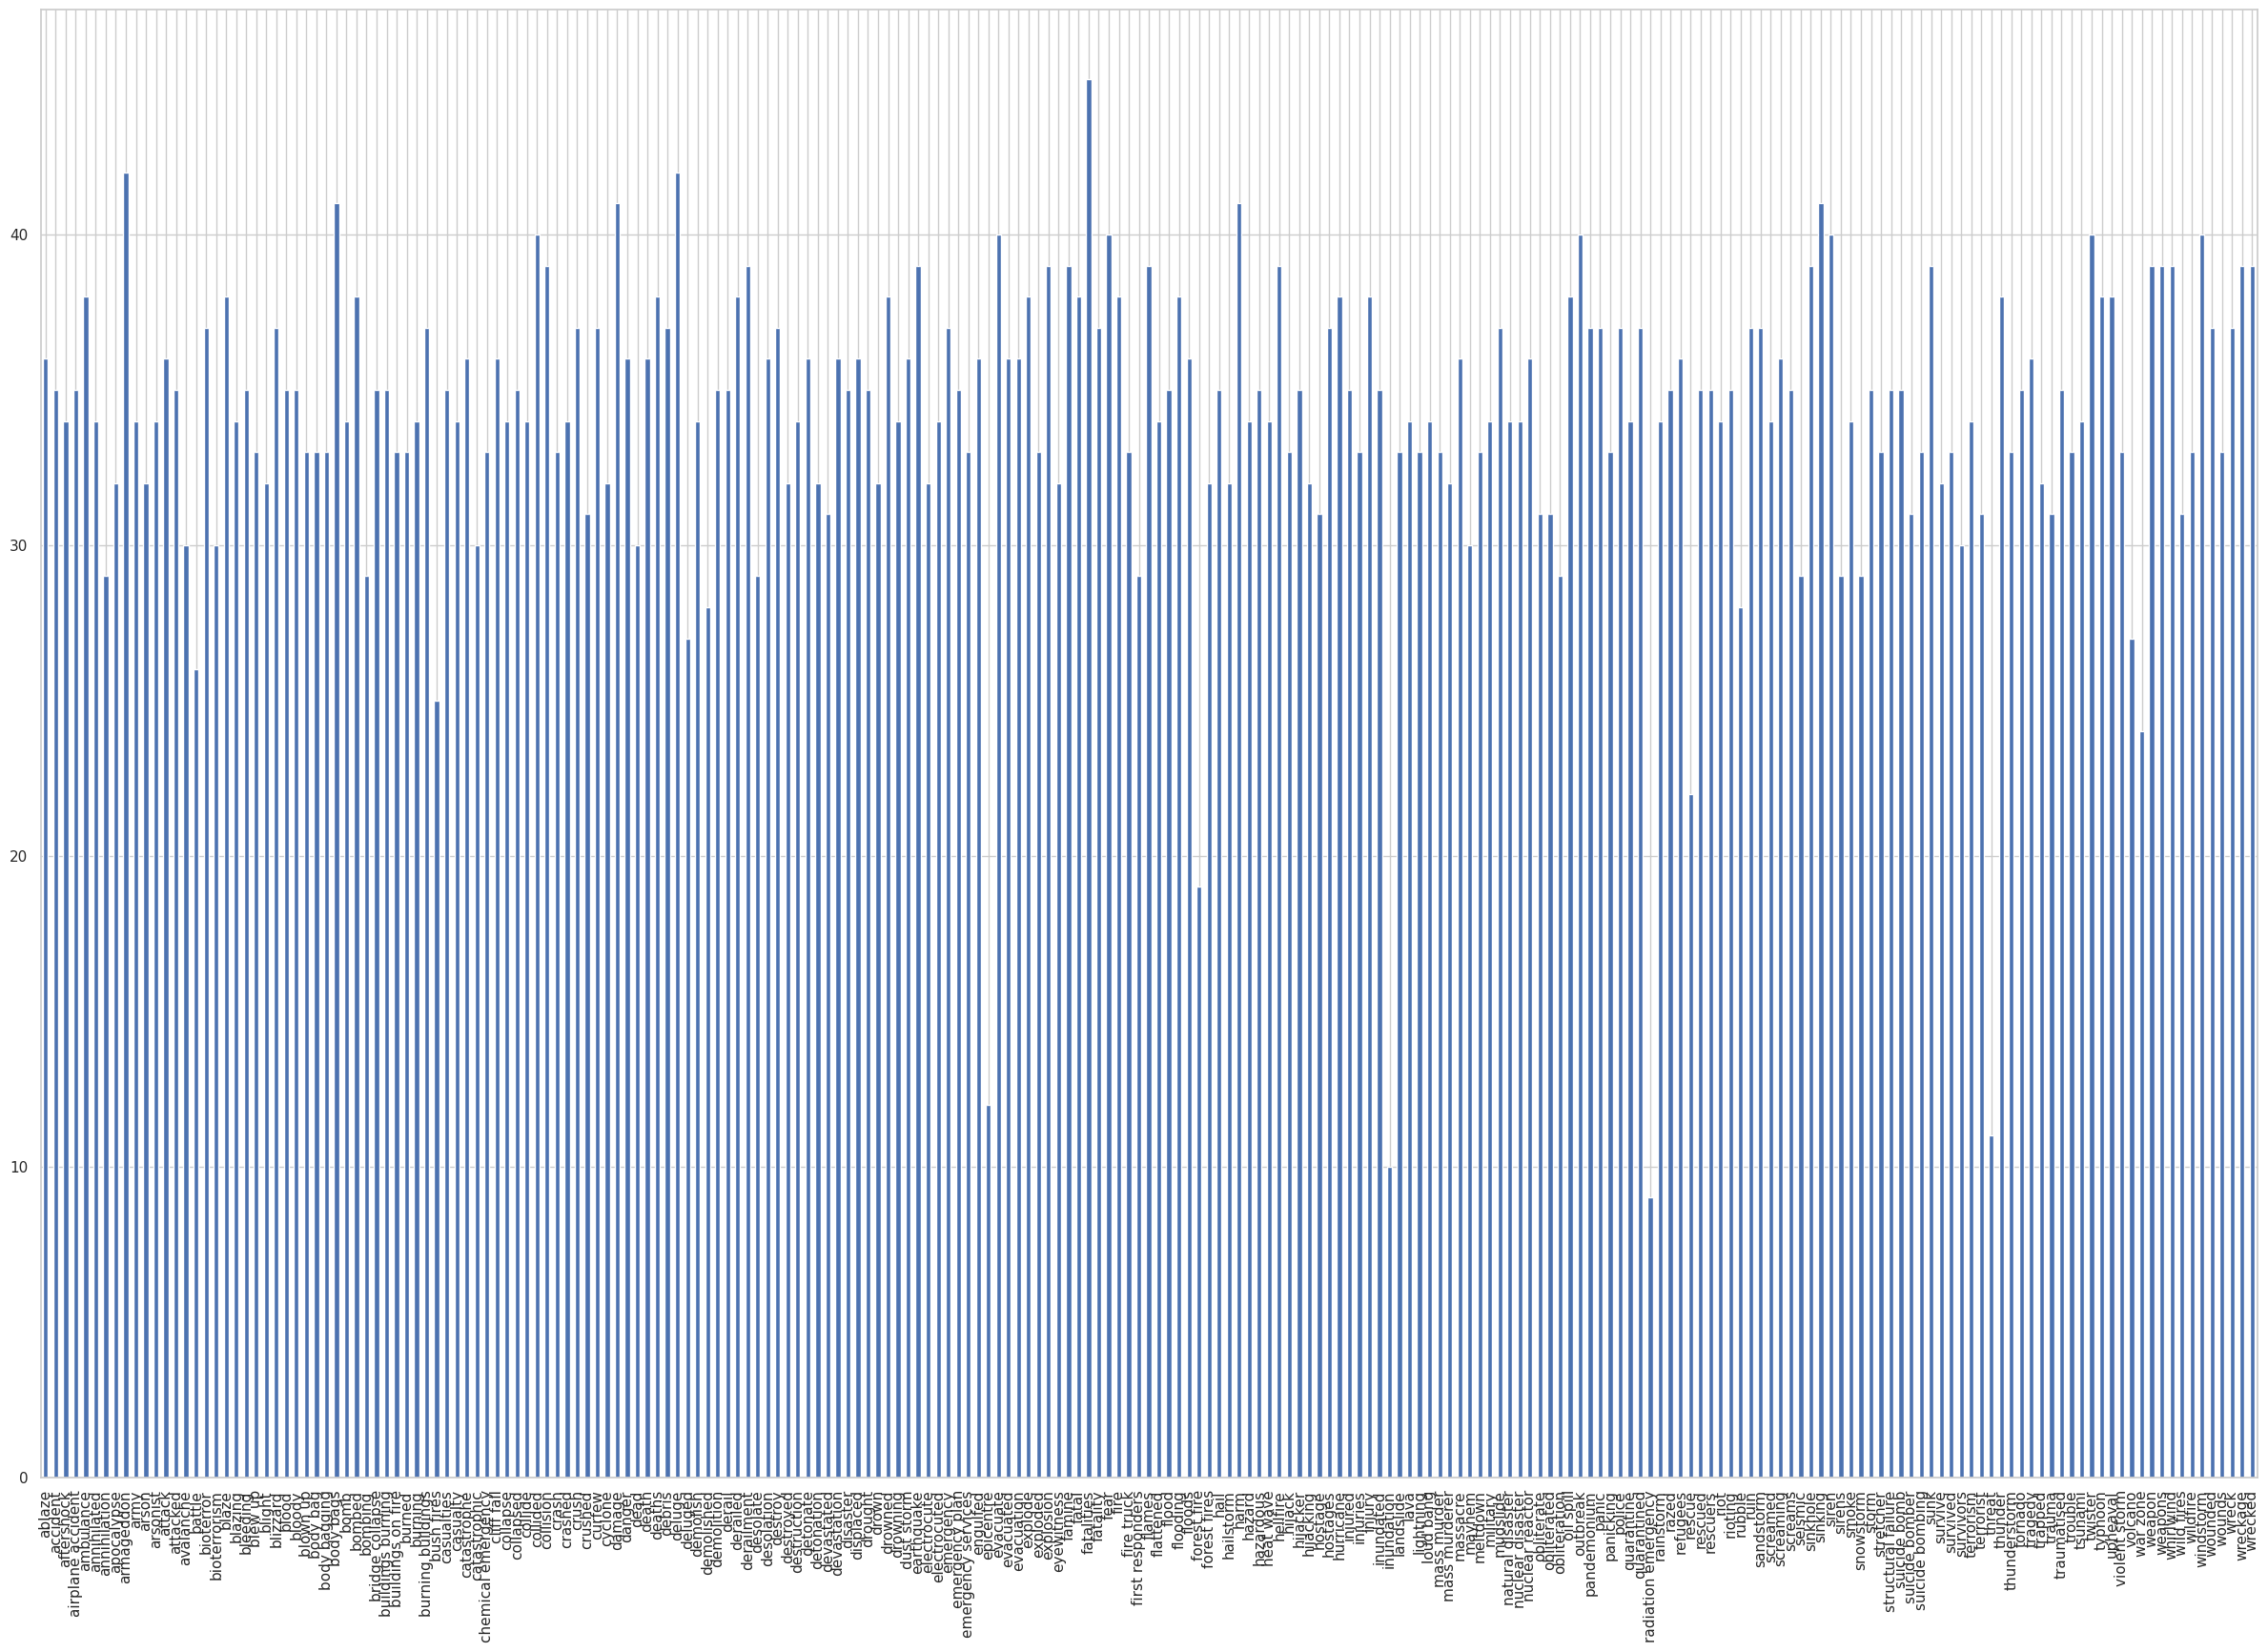

In [67]:
train_without_nan['keyword'].value_counts().sort_index().plot(kind='bar', figsize=(30,20))

Veamos como es su relacion con el target

Text(0.5, 1.0, 'Keyword vs. Target')

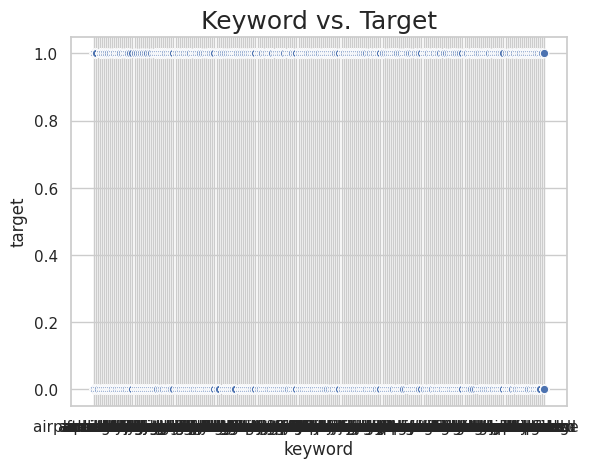

In [69]:
g = sns.scatterplot(x="keyword", y="target", data=train_without_nan)
g.set_title("Keyword vs. Target", fontsize=18)

Veamos como es la relacion con las 3 keywords mas frecuentes respecto al largo de sus textos y el target

In [0]:
top3_keywords = train_without_nan['keyword'].value_counts().nlargest(3)
top3_keywords

fatalities    45
deluge        42
armageddon    42
Name: keyword, dtype: int64

In [0]:
only_with_top3_keywords = train_without_nan[(train_without_nan['keyword'] == 'fatalities') | (train_without_nan['keyword'] == 'deluge') | (train_without_nan['keyword'] == 'armageddon')]
only_with_top3_keywords

,id,keyword,location,text,target,usuariosLinkeados
304,446,armageddon,"California, United States",#PBBan (Temporary:300) avYsss @'aRmageddon | D...,0,True
305,447,armageddon,"California, United States",#PBBan (Temporary:300) Russaky89 @'aRmageddon ...,0,True
306,448,armageddon,#FLIGHTCITY UK,((OFFICIAL VID)) #DoubleCups >> https://t.co/l...,0,True
307,450,armageddon,0,ouvindo Peace Love & Armageddon,0,False
308,451,armageddon,0,Best movie you've ever seen? - Armageddon htt...,0,False
...,...,...,...,...,...,...
3656,5206,fatalities,"Philadelphia, PA",PolicyLab is at @CECANF's last public hearing ...,1,True
3657,5207,fatalities,Just Happy to Be Anywhere,.@KurtSchlichter Yep considering that *million...,1,True
3658,5208,fatalities,0,#Shipping #Logistics eNCA | Fatalities as migr...,1,False
3659,5209,fatalities,"Lima, Ohio",Message boards will display updated traffic fa...,1,False


In [0]:
only_with_top3_keywords['length_text'] = only_with_top3_keywords['text'].apply(len)

Text(0.5, 1.0, 'Relacion entre target y largo de texto de los top3 Keywords')

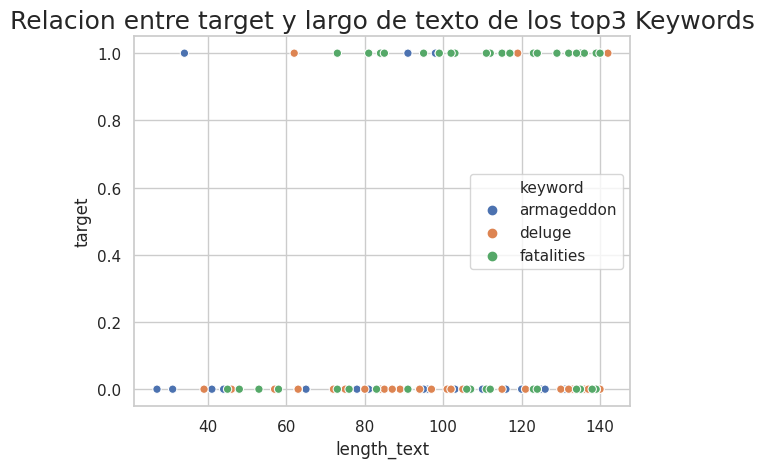

In [0]:
g = sns.scatterplot(x="length_text", y="target", data=only_with_top3_keywords, hue="keyword")
g.set_title("Relacion entre target y largo de texto de los top3 Keywords", fontsize=18)

Miro los Target 1 para el top 10 de **location**

<Figure size 640x480 with 0 Axes>

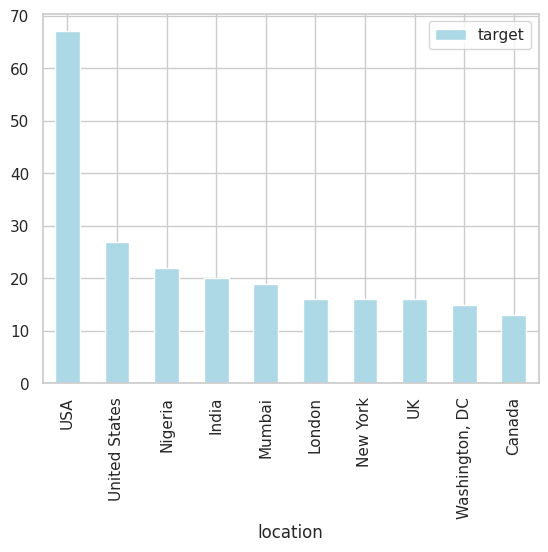

In [65]:
locations_clean = train_without_nan[train_without_nan['location'] != 0]
locations_clean = locations_clean.groupby(['location']).agg({'target': 'sum'}).nlargest(10,'target')

plt.clf()
locations_clean.plot(kind='bar', color='lightblue')
plt.show()

In [0]:
train_without_nan[train_without_nan['text'].str.contains('@')]

,id,keyword,location,text,target,usuariosLinkeados
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,True
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,True
54,78,ablaze,Abuja,Noches El-Bestia '@Alexis_Sanchez: happy to se...,0,True
57,81,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gif...,0,True
63,91,ablaze,"Concord, CA",@Navista7 Steve these fires out here are somet...,1,True
...,...,...,...,...,...,...
7569,10819,wrecked,"Livingston, MT",@marynmck That's beyond adorable. I hope it wo...,0,True
7571,10822,wrecked,Glasgow,@Caitsroberts see U the night wee bArra to get...,0,True
7572,10823,wrecked,"Manhattan, NY",@Kirafrog @mount_wario Did you get wrecked again?,1,True
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0,True


**Miro la relacion del target para los usuarios linkeados en los textos**

<Figure size 640x480 with 0 Axes>

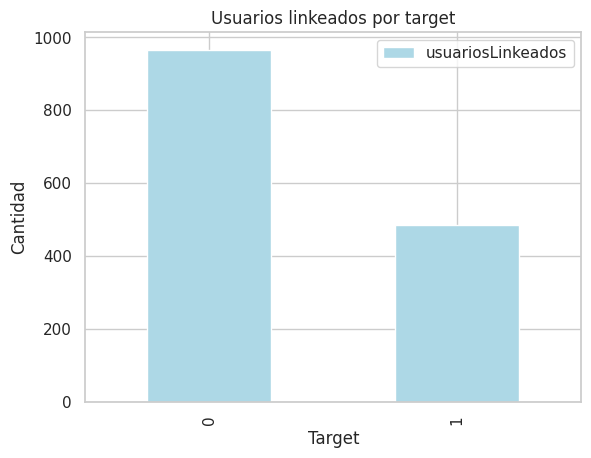

In [0]:
train_without_nan['usuariosLinkeados'] = train_without_nan['text'].str.contains('@')


grouped = train_without_nan.loc[:,['usuariosLinkeados','target']].groupby('target').sum()

grouped.reset_index()

plt.clf()
g = grouped.plot(kind='bar', color='lightblue', title='Usuarios linkeados por target')
g.set_ylabel("Cantidad", fontsize=12)
g.set_xlabel("Target", fontsize=12)
plt.show()

**Miro la relacion del target con el top5 de keywords mas frecuentes**

In [0]:
train_without_nan['keyword'].value_counts().nlargest(5)

fatalities    45
deluge        42
armageddon    42
sinking       41
harm          41
Name: keyword, dtype: int64

In [0]:
cantByfatalitiest1 = train_without_nan[(train_without_nan['keyword'] == 'fatalities') & (train_without_nan['target'] == 1)]
cantBydeluget1 = train_without_nan[(train_without_nan['keyword'] == 'deluge') & (train_without_nan['target'] == 1)]
cantByarmageddont1 = train_without_nan[(train_without_nan['keyword'] == 'armageddon') & (train_without_nan['target'] == 1)]
cantBysinkingt1 = train_without_nan[(train_without_nan['keyword'] == 'sinking') & (train_without_nan['target'] == 1)]
cantByharmt1 = train_without_nan[(train_without_nan['keyword'] == 'harm') & (train_without_nan['target'] == 1)]

cantByfatalitiest0 = train_without_nan[(train_without_nan['keyword'] == 'fatalities') & (train_without_nan['target'] == 0)]
cantBydeluget0 = train_without_nan[(train_without_nan['keyword'] == 'deluge') & (train_without_nan['target'] == 0)]
cantByarmageddont0 = train_without_nan[(train_without_nan['keyword'] == 'armageddon') & (train_without_nan['target'] == 0)]
cantBysinkingt0 = train_without_nan[(train_without_nan['keyword'] == 'sinking') & (train_without_nan['target'] == 0)]
cantByharmt0= train_without_nan[(train_without_nan['keyword'] == 'harm') & (train_without_nan['target'] == 0)]

cantByTop5Keywordst1 = [len(cantByfatalitiest1) , len(cantBydeluget1), len(cantByarmageddont1), len(cantBysinkingt1),len(cantByharmt1)]
cantByTop5Keywordst0 = [len(cantByfatalitiest0) , len(cantBydeluget0), len(cantByarmageddont0), len(cantBysinkingt0),len(cantByharmt0)]




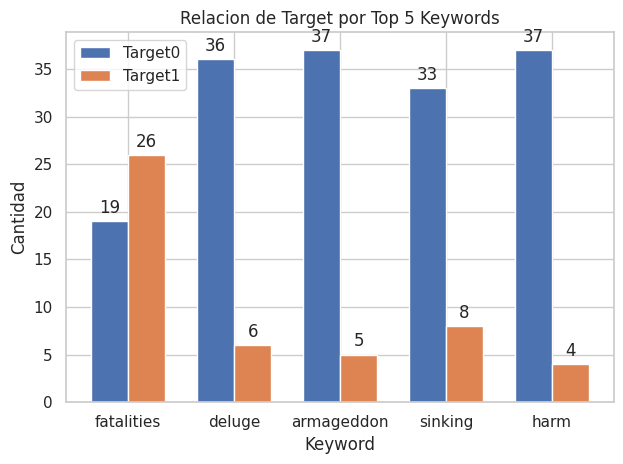

In [0]:
labels = ['fatalities', 'deluge', 'armageddon', 'sinking', 'harm']
top5Keywords_t1 = cantByTop5Keywordst1
top5Keywords_t0 = cantByTop5Keywordst0

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, top5Keywords_t0, width, label='Target0')
rects2 = ax.bar(x + width/2, top5Keywords_t1, width, label='Target1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad')
ax.set_xlabel('Keyword')
ax.set_title('Relacion de Target por Top 5 Keywords')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Text(0, 0.5, 'Cantidad')

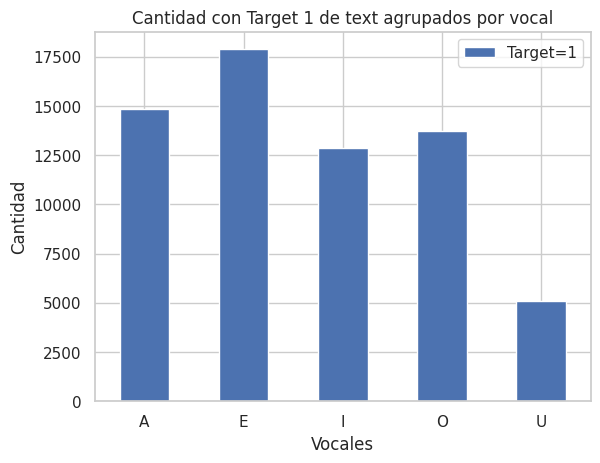

In [0]:
train_without_nan_with_separate_vowels = train_without_nan[train_without_nan['target'] == 1]

train_without_nan_with_separate_vowels['a'] = train_without_nan_with_separate_vowels['text'].str.lower().str.count(r'[a]')
train_without_nan_with_separate_vowels['e'] = train_without_nan_with_separate_vowels['text'].str.lower().str.count(r'[e]')
train_without_nan_with_separate_vowels['i'] = train_without_nan_with_separate_vowels['text'].str.lower().str.count(r'[i]')
train_without_nan_with_separate_vowels['o'] = train_without_nan_with_separate_vowels['text'].str.lower().str.count(r'[o]')
train_without_nan_with_separate_vowels['u'] = train_without_nan_with_separate_vowels['text'].str.lower().str.count(r'[u]')





cantByA = train_without_nan_with_separate_vowels['a'].sum()
cantByE = train_without_nan_with_separate_vowels['e'].sum()
cantByI = train_without_nan_with_separate_vowels['i'].sum()
cantByO = train_without_nan_with_separate_vowels['o'].sum()
cantByU = train_without_nan_with_separate_vowels['u'].sum()


cantByVowel = [cantByA , cantByE, cantByI, cantByO,cantByU]

cantByVowel

df = pd.DataFrame({'Vocales':['A', 'E', 'I','O','U'], 'Target=1': cantByVowel})
ax = df.plot.bar(title='Cantidad con Target 1 de text agrupados por vocal',x='Vocales',y='Target=1', rot=0)
ax.set_ylabel("Cantidad", fontsize=12)

In [0]:
main_keywords_counts = train_without_nan['keyword'].value_counts()
main_keywords_counts = main_keywords_counts[main_keywords_counts > 38]

Text(0, 0.5, 'Keyword')

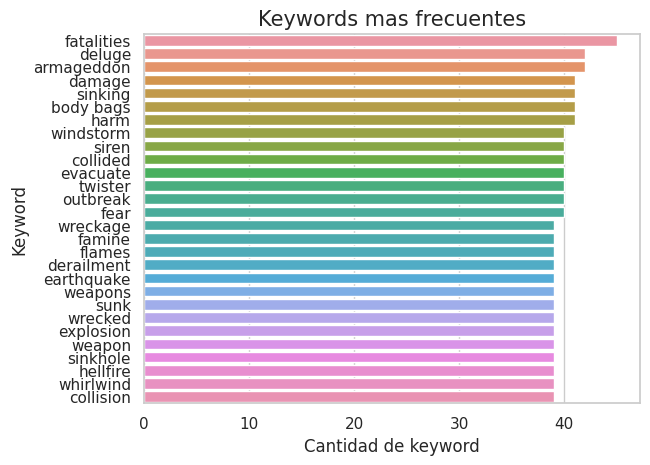

In [23]:
g = sns.barplot(x=main_keywords_counts.values, y=main_keywords_counts.index, orient='h')
g.set_title("Keywords mas frecuentes", fontsize=15)
g.set_xlabel("Cantidad de keyword", fontsize=12)
g.set_ylabel("Keyword", fontsize=12)

Text(0, 0.5, 'Keyword')

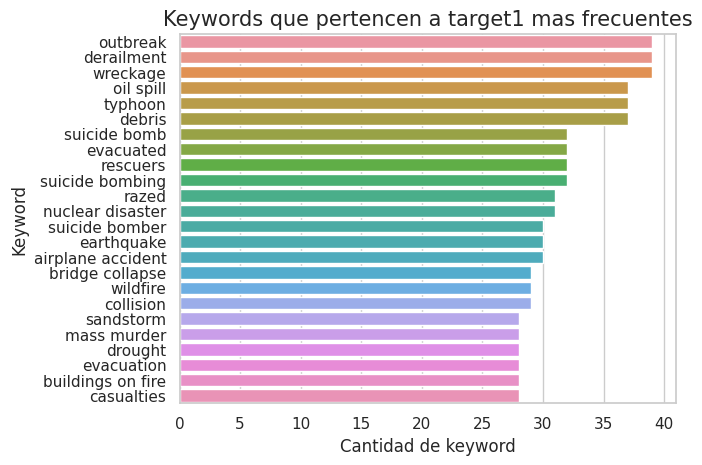

In [28]:
only_t1 = train_without_nan[train_without_nan['target'] == 1]

main_t1_keywords_counts = only_t1['keyword'].value_counts()

main_t1_keywords_counts = main_t1_keywords_counts[main_t1_keywords_counts > 27]

g = sns.barplot(x=main_t1_keywords_counts.values, y=main_t1_keywords_counts.index, orient='h')
g.set_title("Keywords que pertencen a target1 mas frecuentes", fontsize=15)
g.set_xlabel("Cantidad de keyword", fontsize=12)
g.set_ylabel("Keyword", fontsize=12)